## ALEを用いた結果の解釈

今回は[こちら](https://github.com/blent-ai/ALEPython)のライブラリを使用   
\* ただしWork in Progressであることに留意

In [1]:
%matplotlib inline
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from alepython.ale import ale_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df_org = pd.read_csv('../../data/day.csv', header=0)
df_org.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#今回使用するカラムに限定
used_columns = ['cnt', 'season', 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed']
df = df_org.loc[:,used_columns]
df.head()

,cnt,season,yr,mnth,holiday,weathersit,temp,hum,windspeed
0,985,1,0,1,0,2,0.344167,0.805833,0.160446
1,801,1,0,1,0,2,0.363478,0.696087,0.248539
2,1349,1,0,1,0,1,0.196364,0.437273,0.248309
3,1562,1,0,1,0,1,0.200000,0.590435,0.160296
4,1600,1,0,1,0,1,0.226957,0.436957,0.186900


In [4]:
#特定のカラムに関して、ダミー変数を作成する

ohe_columns = ['season', 'mnth', 'weathersit']
df_ohe = pd.get_dummies(df, columns=ohe_columns)

In [5]:
X = df_ohe.iloc[:, 1:]
y = df_ohe.iloc[:, 0]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

X.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.805833,0.160446,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0.363478,0.696087,0.248539,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0.196364,0.437273,0.248309,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0.200000,0.590435,0.160296,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0.226957,0.436957,0.186900,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=50)
rf_model.fit(train_X, train_y)

pred_y = rf_model.predict(test_X)
score = sqrt(mean_squared_error(test_y, pred_y))

print('RMSE: {}'.format(score))

RMSE: 709.449339870619


Quantiles : [0.0591304 0.2588331 0.313333  0.3540836 0.4143336 0.4854165 0.554167
 0.628583  0.6853332 0.7328332 0.849167 ]


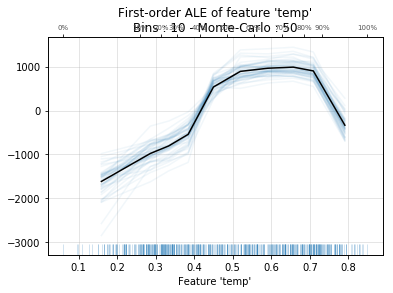

In [7]:
# Accumulated Local Effects
# 図示に少し時間がかかる

ale_plot(rf_model, train_X, 'temp', monte_carlo=True)

PDPのときと軸が異なるため直接比較はできないが、temp>0.7のときの傾きはPDPのときに比べ急になっている（あくまで参考意見）。